In [1]:
# import and load the model onto the device
import torch
from transformers import SamModel, SamProcessor

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = SamProcessor.from_pretrained("wanglab/medsam-vit-base")
model = SamModel.from_pretrained("wanglab/medsam-vit-base").to(device)

ImportError: cannot import name 'SamModel' from 'transformers' (/Users/lolaassad/anaconda3/lib/python3.10/site-packages/transformers/__init__.py)

In [ ]:
#import other required modules
import os
import cv2
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
# visualize the model architecture
model.to(device)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
     

In [ ]:
# load a sample image
image = cv2.imread("rarareerah.jpg")

In [ ]:
# resize the image to match the convolutional layers in MedSAM's architecture
image = cv2.resize(image,(256,256))

In [ ]:
# confirm the images shape
image.shape

(256, 256, 3)

(-0.5, 255.5, 255.5, -0.5)

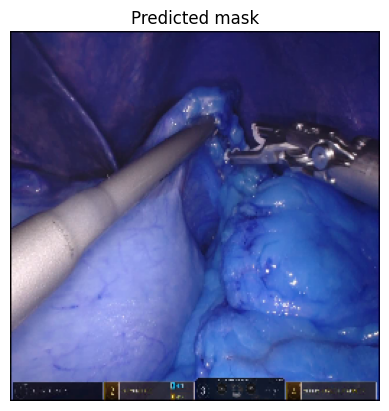

In [ ]:
# a function for displaying the mask onto the images using
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

fig, axes = plt.subplots()

axes.imshow(np.array(image))
#show_mask(medsam_seg, axes)
axes.title.set_text(f"Predicted mask")
axes.axis("off")

In [ ]:
for file in os.walk('/content/drive/MyDrive/Surgical Scenes'):
  print(file[2])
  for image in file[2]:
    image = cv2.imread(image)
    print(image)
    #image = cv2.resize(image,(256,256))
    #fig, axes = plt.subplots()

    #axes.imshow(np.array(image))
    #axes.title.set_text(f"Predicted mask")
    #axes.axis("off")

['R001_ch1_video_01_00-10-37-20.jpg', 'R001_ch1_video_01_00-15-45-29.jpg', 'R001_ch1_video_01_00-19-55-03.jpg', 'R001_ch1_video_01_00-21-47-07.jpg', 'R001_ch1_video_01_00-22-06-28.jpg', 'R001_ch1_video_01_00-26-29-12.jpg', 'R001_ch1_video_01_00-28-00-16.jpg', 'R001_ch1_video_01_01-11-41-09.jpg', 'R001_ch1_video_01_01-11-51-01.jpg', 'R001_ch1_video_01_01-12-00-18.jpg', 'R001_ch1_video_03_00-15-41-20.jpg', 'R001_ch1_video_03_00-16-24-08.jpg', 'R001_ch1_video_03_00-18-42-07.jpg', 'R001_ch1_video_03_00-51-13-12.jpg', 'R001_ch1_video_03_00-54-11-02.jpg', 'R001_ch1_video_03_00-52-00-17.jpg', 'R001_ch1_video_03_00-55-11-00.jpg', 'R001_ch1_video_03_00-57-53-26.jpg', 'R001_ch1_video_03_01-11-44-17.jpg', 'R001_ch1_video_03_01-13-15-02.jpg', 'R002_ch1_video_01_00-04-52-18.jpg', 'R002_ch1_video_01_00-38-24-12.jpg', 'R002_ch1_video_01_00-41-27-13.jpg', 'R002_ch1_video_01_00-49-11-28.jpg', 'R002_ch1_video_01_00-41-54-26.jpg', 'R002_ch1_video_01_00-58-49-16.jpg', 'R002_ch1_video_03_00-04-02-12.jpg']
